Data Analyzing

- How many rows and columns?
- What is the correlation between the variables and the price? (Why might that be?)
- How are variables correlated to each other? (Why?)
- Which variables have the greatest influence on the price?
- Which variables have the least influence on the price?
- How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

Quantitative Comparisons

    Price and property characteristics:
        Price vs. LivingArea: Do properties with larger living areas tend to be more expensive?
        Price vs. BedroomCount: How does the number of bedrooms influence the price?
        Price vs. ConstructionYear: Are newer properties more expensive than older ones?

    Surface area and amenities:
        GardenArea vs. LivingArea: Do properties with larger living areas also have bigger gardens?
        SurfaceOfPlot vs. LivingArea: Is there a correlation between the plot size and the living area?

Categorical Comparisons

    Property type and characteristics:
        TypeOfProperty vs. RoomCount: Do different property types (house, apartment, etc.) differ significantly in the number of rooms?
        TypeOfProperty vs. Garden: What proportion of each property type has a garden?

    Location and price:
        Province vs. Price: How do prices vary from one province to another?
        District vs. Price: Are there significant price variations between different districts?

Mixed Comparisons

    Building condition and price:
        StateOfBuilding vs. Price: Are properties in better condition more expensive?
        StateOfBuilding vs. ConstructionYear: Are older buildings generally in worse condition?

    Amenities and location:
        SwimmingPool vs. Region: Are swimming pools more common in certain regions?
        Fireplace vs. Province: Do some provinces have a higher proportion of properties with fireplaces?

Other Interesting Comparisons

    Monthly charges and property characteristics:
        MonthlyCharges vs. LivingArea: Do properties with larger living areas have higher monthly charges?
        MonthlyCharges vs. RoomCount: How does the number of rooms affect monthly charges?

    Interior amenities and condition:
        Furnished vs. StateOfBuilding: Are furnished properties generally in better condition?

These comparisons can help you discover trends, relationships, and valuable insights for analyzing your data.

Pour une analyse d'une base de données pour une agence immobilière avec les colonnes que vous avez mentionnées, différents graphiques peuvent être réalisés avec Matplotlib pour visualiser et mieux comprendre les données. Voici quelques suggestions de graphiques pertinents :

    Histogrammes :
        Distribution des prix (Price).
        Distribution des surfaces habitables (LivingArea).
        Distribution des années de construction (ConstructionYear).
        Distribution des charges mensuelles (MonthlyCharges).

    Diagrammes en barres :
        Nombre de propriétés par pays (Country), province (Province), région (Region), ou localité (Locality).
        Nombre de propriétés avec certaines caractéristiques comme la piscine (SwimmingPool), la cheminée (Fireplace), ou le jardin (Garden).

    Boxplots :
        Prix (Price) par nombre de chambres (BedroomCount).
        Prix (Price) par état du bâtiment (StateOfBuilding).
        Prix (Price) par type de propriété (TypeOfProperty).

    Scatter plots (nuages de points) :
        Prix (Price) en fonction de la surface habitable (LivingArea).
        Prix (Price) en fonction de la surface du terrain (SurfaceOfPlot).
        Prix (Price) en fonction de l'année de construction (ConstructionYear).

    Heatmaps :
        Corrélation entre différentes variables numériques (ex : Price, LivingArea, BedroomCount, BathroomCount, GardenArea, etc.).

    Pie charts (diagrammes en secteurs) :
        Proportion des types de propriété (TypeOfProperty).
        Proportion des types de vente (TypeOfSale).

    Violin plots :
        Distribution des prix (Price) par type de propriété (TypeOfProperty).
        Distribution des prix (Price) par nombre de chambres (BedroomCount).

    Geographical plots :
        Répartition géographique des propriétés sur une carte en fonction de la localité (Locality), le code postal (PostalCode), la région (Region), ou la province 

Import libraries and establish df for sales

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder


df_sales = pd.read_csv('df_cleaned_sale.csv')
df_rent = pd.read_csv('df_cleaned_rent.csv')
df = pd.read_csv('DF_cleaned.csv')

df



#need to do smaller df for the analyzes in the next steps




,Unnamed: 0,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,2,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,...,1,0,GOOD,flat_studio,255,0,1,1,2,residential_sale
1,8,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,...,2,0,GOOD,house,0,0,0,2,1,residential_sale
2,10,https://www.immoweb.be/en/classified/house/for...,1,4,1971,Belgium,Veurne,0,NON_FLOOD_ZONE,0,...,2,0,TO_BE_DONE_UP,house,170,0,1,2,1,residential_sale
3,11,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,...,1,0,AS_NEW,apartment,255,0,1,1,2,residential_sale
4,14,https://www.immoweb.be/en/classified/apartment...,1,1,1994,Belgium,Brussels,0,NON_FLOOD_ZONE,1,...,2,0,AS_NEW,apartment,255,0,1,1,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70962,181784,https://www.immoweb.be/en/classified/apartment...,1,1,1971,Belgium,Mouscron,0,NON_FLOOD_ZONE,0,...,2,1,GOOD,apartment,255,0,0,1,2,residential_monthly_rent
70963,181786,https://www.immoweb.be/en/classified/apartment...,1,1,2017,Belgium,Tongeren,0,NON_FLOOD_ZONE,0,...,2,0,GOOD,service_flat,255,0,1,1,2,residential_sale
70964,181789,https://www.immoweb.be/en/classified/house/for...,4,4,1971,Belgium,Antwerp,0,NON_FLOOD_ZONE,0,...,2,0,JUST_RENOVATED,apartment_block,202,0,0,1,1,residential_sale
70965,181790,https://www.immoweb.be/en/classified/apartment...,1,2,1971,Belgium,Antwerp,0,NON_FLOOD_ZONE,0,...,2,0,GOOD,apartment,255,0,1,1,2,residential_sale


In [116]:
df_sales.columns


Index(['BathroomCount', 'BedroomCount', 'ConstructionYear', 'District',
       'Fireplace', 'Furnished', 'Garden', 'GardenArea', 'Kitchen',
       'LivingArea', 'Locality', 'NumberOfFacades', 'PEB', 'PostalCode',
       'Price', 'PropertyId', 'Province', 'Region', 'RoomCount', 'ShowerCount',
       'StateOfBuilding', 'SubtypeOfProperty', 'SurfaceOfPlot', 'SwimmingPool',
       'Terrace', 'ToiletCount', 'TypeOfSale'],
      dtype='object')

Lets show distrutions of (Price)(LivingArea)(ConstructionYear)

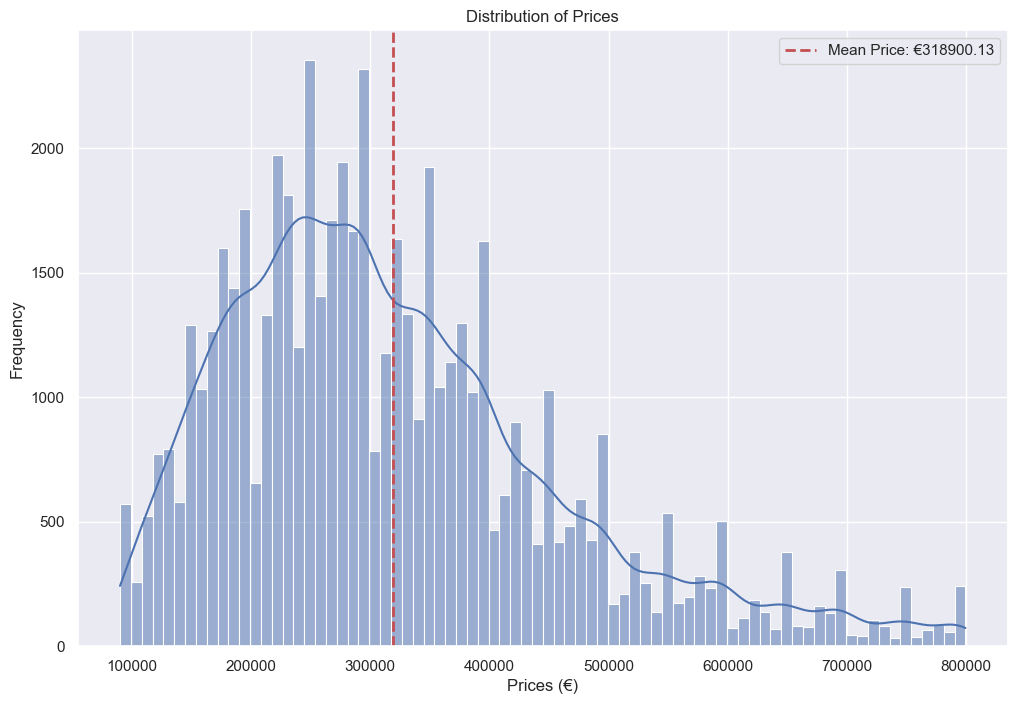

In [117]:

import seaborn as sns
df_average_price = df['Price'].mean()
df['Price'] < 800000

df_filtered = df_sales[df_sales['Price'] < 800000]

df_average_price = df_filtered['Price'].mean()
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.histplot(df_filtered['Price'], kde=True) 
plt.title('Distribution of Prices')
plt.xlabel('Prices (€)')
plt.ylabel('Frequency')
plt.axvline(df_average_price, color='r', linestyle='--', linewidth=2, label=f'Mean Price: €{df_average_price:.2f}')  
plt.legend()
plt.show()


Living area distribution

C:\Users\pieta\AppData\Local\Temp\ipykernel_25664\3626804505.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_filtered['LivingArea'], kde=True,palette='Blues_d')


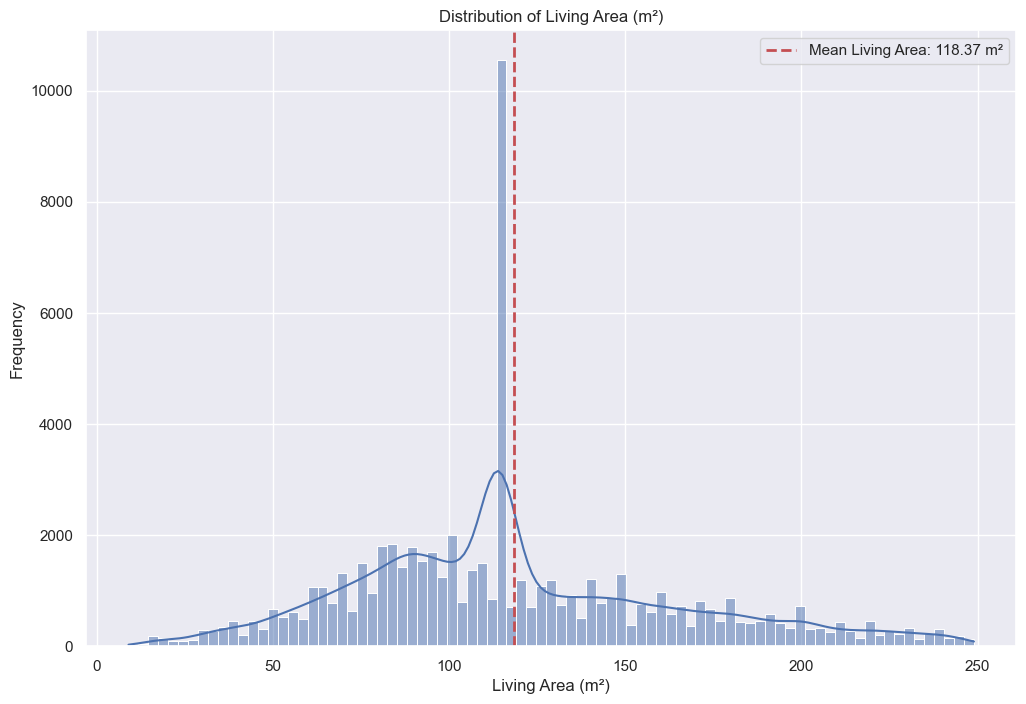

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_sales = pd.read_csv('DF_living_Area.csv')


df_filtered = df_sales[df_sales['LivingArea'] < 250]


df_average_Area = df_filtered['LivingArea'].mean()


plt.figure(figsize=(12, 8))
sns.histplot(df_filtered['LivingArea'], kde=True,palette='Blues_d')
plt.title('Distribution of Living Area (m²)')
plt.xlabel('Living Area (m²)')
plt.ylabel('Frequency')
plt.axvline(df_average_Area, color='r', linestyle='--', linewidth=2, label=f'Mean Living Area: {df_average_Area:.2f} m²')
plt.legend()
plt.show()






In [119]:
df_sales.head()

,LivingArea
0,29
1,111
2,114
3,92
4,50


Year of construction distribution 

C:\Users\pieta\AppData\Local\Temp\ipykernel_25664\1425193300.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_contruct_year['Decade'] = (df_price_contruct_year['ConstructionYear'] // 10) * 10


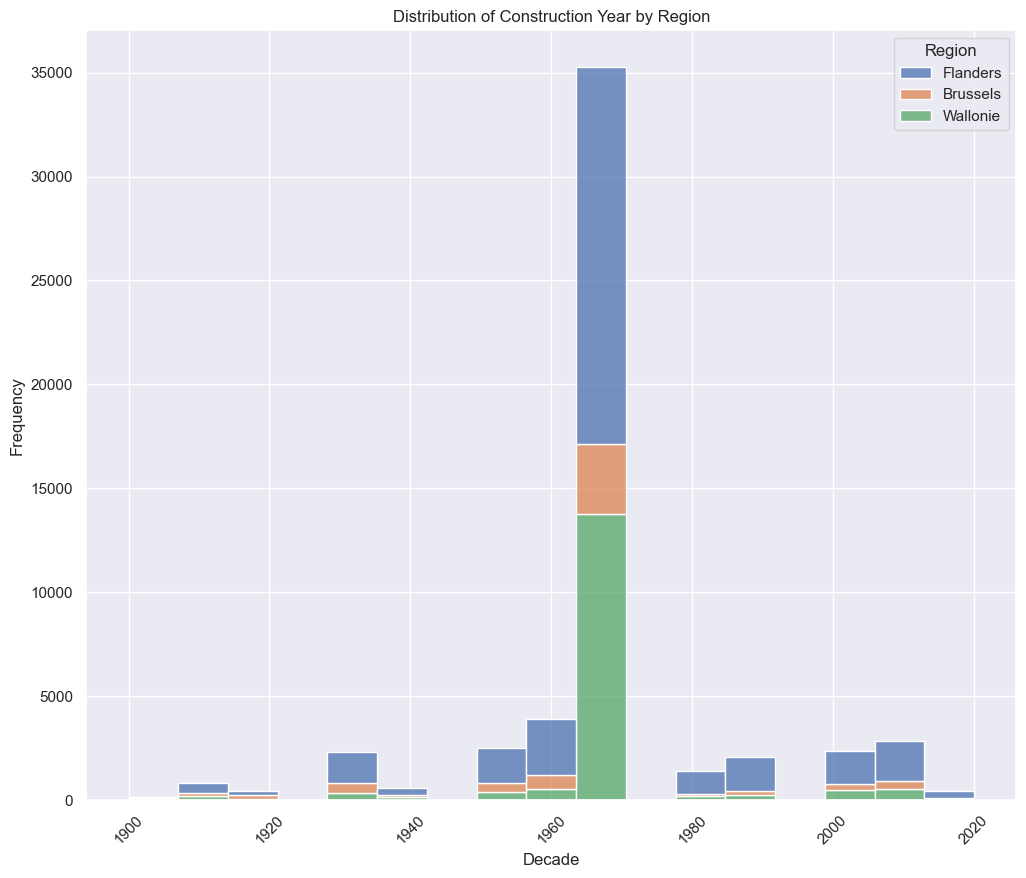

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv('df_cleaned_sale.csv')

# Filter the data
df_price_contruct_year = df[(df['ConstructionYear'] > 1900) & (df['Price'] < 800000) & (df['Price'] > 10000)]

# Calculate the 'Decade' column
df_price_contruct_year['Decade'] = (df_price_contruct_year['ConstructionYear'] // 10) * 10

# Plot the histogram
plt.figure(figsize=(12, 10))
sns.histplot(df_price_contruct_year, x='Decade', hue='Region', kde=False, multiple='stack')
plt.title('Distribution of Construction Year by Region')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Lets analyze some correlations with the price

- year of construction
- region
- type of property
- room count
- state of building


Median Price by Construction Decade

C:\Users\pieta\AppData\Local\Temp\ipykernel_25664\346752611.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_agg, x='Decade', y='Price',  palette='Blues_d')


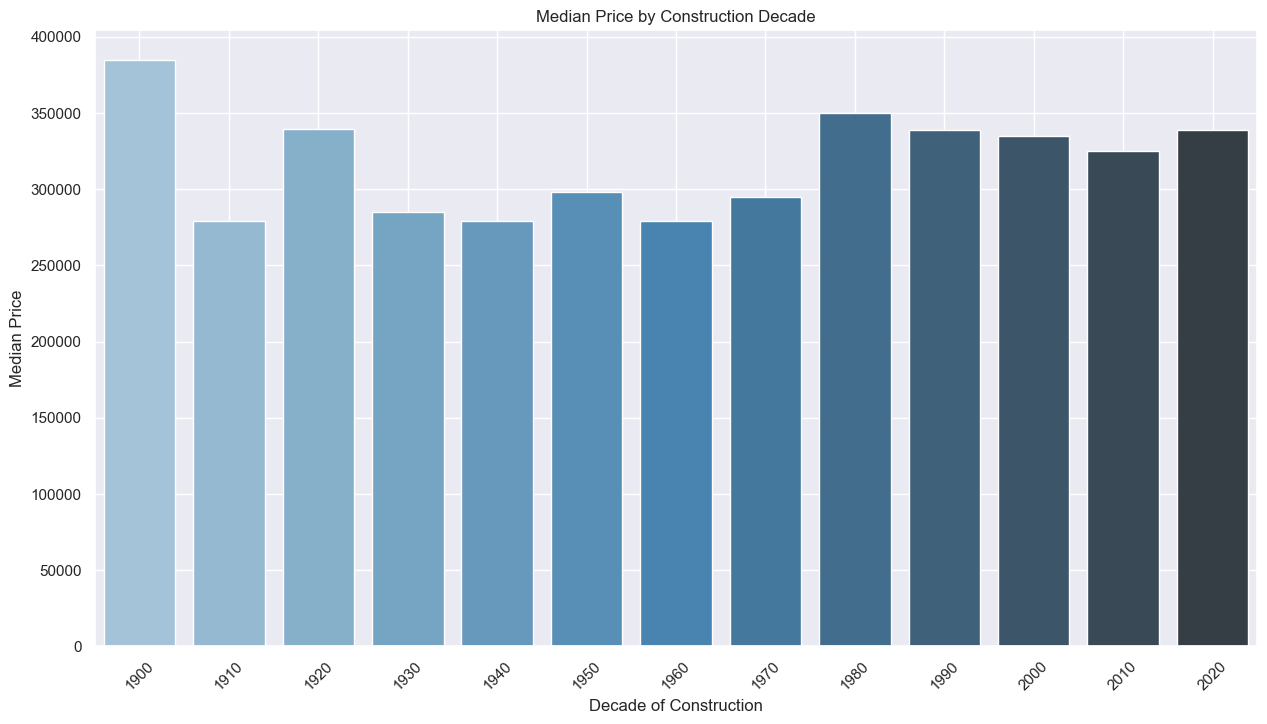

Correlation between Price and ConstructionYear:
                      Price  ConstructionYear
Price             1.000000          0.054134
ConstructionYear  0.054134          1.000000


In [121]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('df_cleaned_sale.csv')


df_filtered = df[(df['ConstructionYear'] > 1900) & (df['Price'] > 10000)].copy()


df_filtered['Decade'] = (df_filtered['ConstructionYear'] // 10) * 10


data_agg = df_filtered.groupby('Decade')['Price'].median().reset_index()


plt.figure(figsize=(15, 8))
sns.barplot(data=data_agg, x='Decade', y='Price',  palette='Blues_d')
plt.title('Median Price by Construction Decade')
plt.xlabel('Decade of Construction')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




correlation = df[['Price', 'ConstructionYear']].corr()
print("Correlation between Price and ConstructionYear:\n", correlation)




#grouper années faire un new df avec ces colonnes price et construction year goupby et aggrégations



Relationship between Median Price and Region

C:\Users\pieta\AppData\Local\Temp\ipykernel_25664\1097571388.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_price_region, x='Region', y='Price', palette='Blues_d')


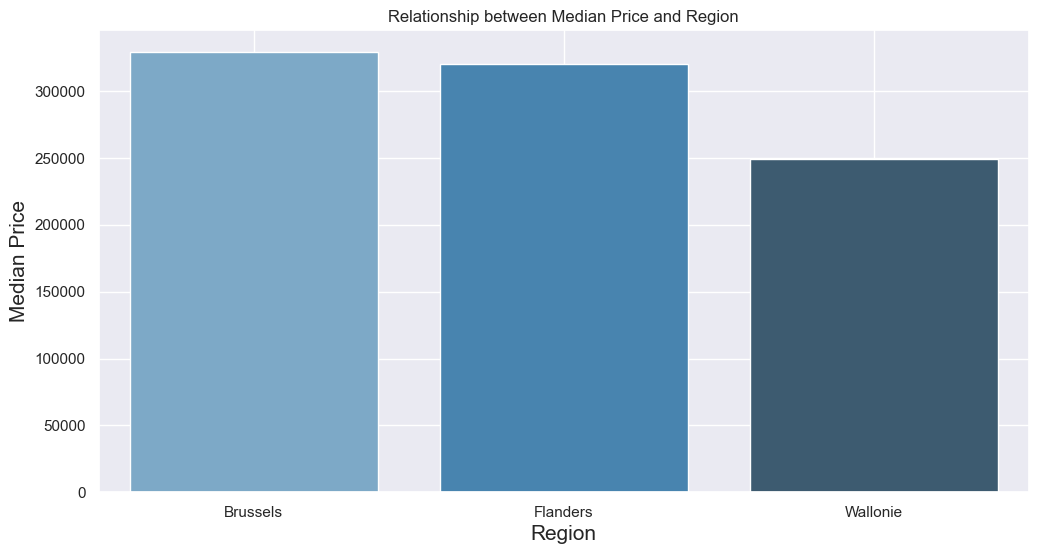

'from sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\ndf[\'Region_encoded\'] = le.fit_transform(df[\'Region\'])\n\n# Calculate correlation\ncorrelation = df[[\'Price\', \'Region_encoded\']].corr()\n\nprint("Correlation between Price and Region (encoded):")\nprint(correlation)'

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




df_filtered = df[(df['ConstructionYear'] > 1900) &
                 (df['Price'] < 800000) &
                 (df['Price'] > 10000) &
                 (df['Price'] != 0)]

df_price_region = df_filtered.groupby('Region')['Price'].median().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=df_price_region, x='Region', y='Price', palette='Blues_d')
plt.title('Relationship between Median Price and Region')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Median Price', fontsize=15)
plt.grid(True)
plt.show()


'''from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])

# Calculate correlation
correlation = df[['Price', 'Region_encoded']].corr()

print("Correlation between Price and Region (encoded):")
print(correlation)'''








#subtype df avec groupby et mean 
#label encoding for dealing with catégorical variables



Distribution of Price by Type of Property

C:\Users\pieta\AppData\Local\Temp\ipykernel_25664\3858077011.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_filtered['TypeOfProperty'] = df_price_filtered['TypeOfProperty'].replace(property_map)
C:\Users\pieta\AppData\Local\Temp\ipykernel_25664\3858077011.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df_price_filtered, x='TypeOfProperty', y='Price',palette='Blues_d')


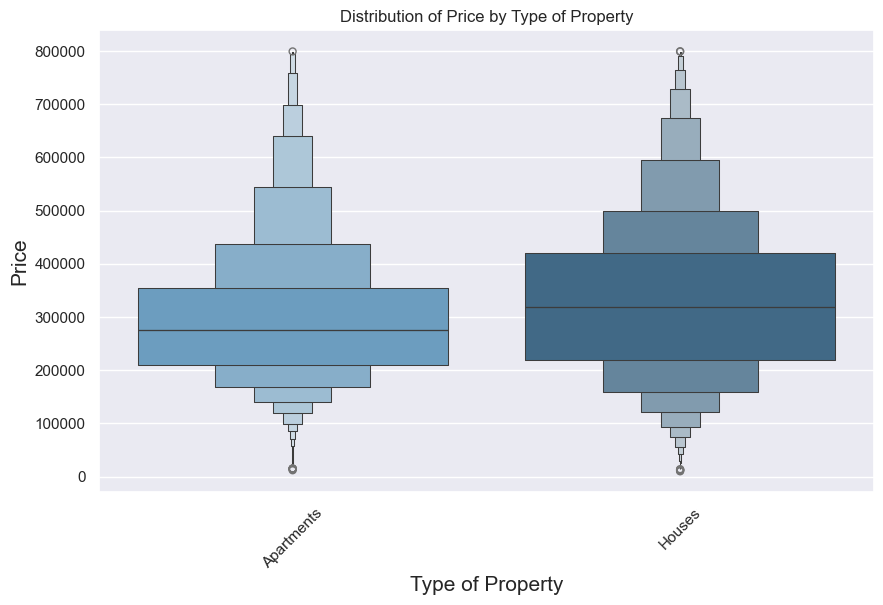

In [123]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('DF_cleaned.csv')


df_price_filtered = df[(df['ConstructionYear'] > 1900) & 
                       (df['Price'] < 800000) & 
                       (df['Price'] > 10000)]


property_map = {1: 'Houses', 2: 'Apartments'}


df_price_filtered['TypeOfProperty'] = df_price_filtered['TypeOfProperty'].replace(property_map)
set
sns.color_palette()
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_price_filtered, x='TypeOfProperty', y='Price',palette='Blues_d')
plt.title('Distribution of Price by Type of Property')
plt.xlabel('Type of Property', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(rotation=45)
plt.show()


#df[['Price', 'SubtypeOfProperty']].corr(method='spearman')






Relationship between Price and Subtype of Property

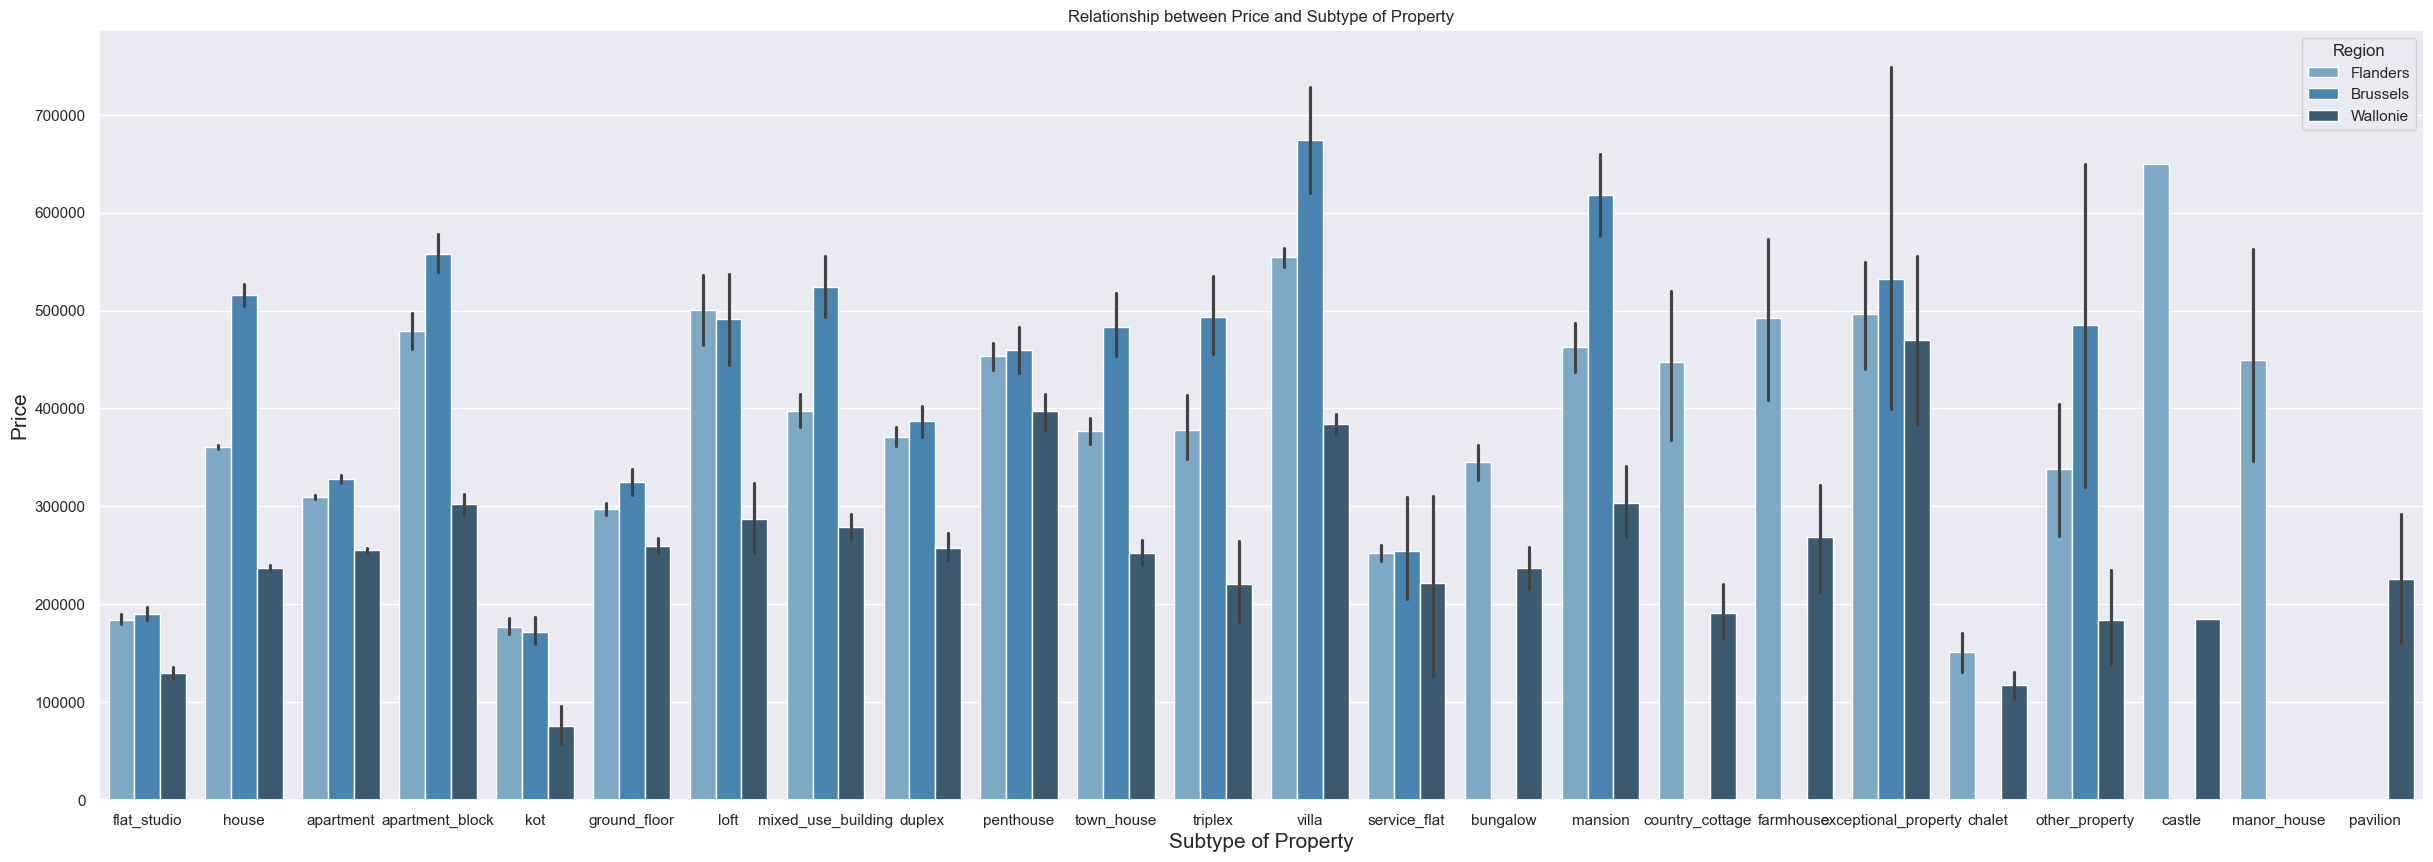

In [124]:
df = pd.read_csv('DF_cleaned.csv')


df_price_filtered = df[(df['ConstructionYear'] > 1900) & 
                       (df['Price'] < 800000) & 
                       (df['Price'] > 10000) & 
                       (df['Price'] != 0)]


sns.color_palette()
plt.figure(figsize=(30, 10))
sns.barplot(data=df_price_filtered, x='SubtypeOfProperty', y='Price',hue= 'Region',palette='Blues_d')
plt.title('Relationship between Price and Subtype of Property')
plt.xlabel('Subtype of Property', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()


In [125]:
'''import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('DF_cleaned.csv')


property_map = {
    1: 'GOOD',
    2: 'TO_BE_DONE_UP',
    3: 'AS_NEW',
    4: 'TO_RESTORE',
    5: 'JUST_RENOVATED',
    6: 'TO_RENOVATE'

#24 subtypes à changer
#même méthodo
}


df['TypeOfProperty'] = df['TypeOfProperty'].replace(property_map)


le = LabelEncoder()
df['StateOfBuilding_encoded'] = le.fit_transform(df['StateOfBuilding'])


correlation = df[['Price', 'StateOfBuilding_encoded']].corr(method='spearman')

print("Correlation between Price and StateOfBuilding (encoded):")
print(correlation)


plt.figure(figsize=(20, 10))
sns.heatmap(data=df_price_filtered, x='Price', y='SubtypeOfProperty')
plt.title('Relationship between Price and Subtype of Property')
plt.xlabel('Price')
plt.ylabel('Subtype of Property')
plt.show()





#df[['Price', 'SubtypeOfProperty']].corr(method='spearman')'''


'import pandas as pd\nfrom sklearn.preprocessing import LabelEncoder\n\n\ndf = pd.read_csv(\'DF_cleaned.csv\')\n\n\nproperty_map = {\n    1: \'GOOD\',\n    2: \'TO_BE_DONE_UP\',\n    3: \'AS_NEW\',\n    4: \'TO_RESTORE\',\n    5: \'JUST_RENOVATED\',\n    6: \'TO_RENOVATE\'\n\n#24 subtypes à changer\n#même méthodo\n}\n\n\ndf[\'TypeOfProperty\'] = df[\'TypeOfProperty\'].replace(property_map)\n\n\nle = LabelEncoder()\ndf[\'StateOfBuilding_encoded\'] = le.fit_transform(df[\'StateOfBuilding\'])\n\n\ncorrelation = df[[\'Price\', \'StateOfBuilding_encoded\']].corr(method=\'spearman\')\n\nprint("Correlation between Price and StateOfBuilding (encoded):")\nprint(correlation)\n\n\nplt.figure(figsize=(20, 10))\nsns.heatmap(data=df_price_filtered, x=\'Price\', y=\'SubtypeOfProperty\')\nplt.title(\'Relationship between Price and Subtype of Property\')\nplt.xlabel(\'Price\')\nplt.ylabel(\'Subtype of Property\')\nplt.show()\n\n\n\n\n\n#df[[\'Price\', \'SubtypeOfProperty\']].corr(method=\'spearman\')'

Relationship between Price and Living Area

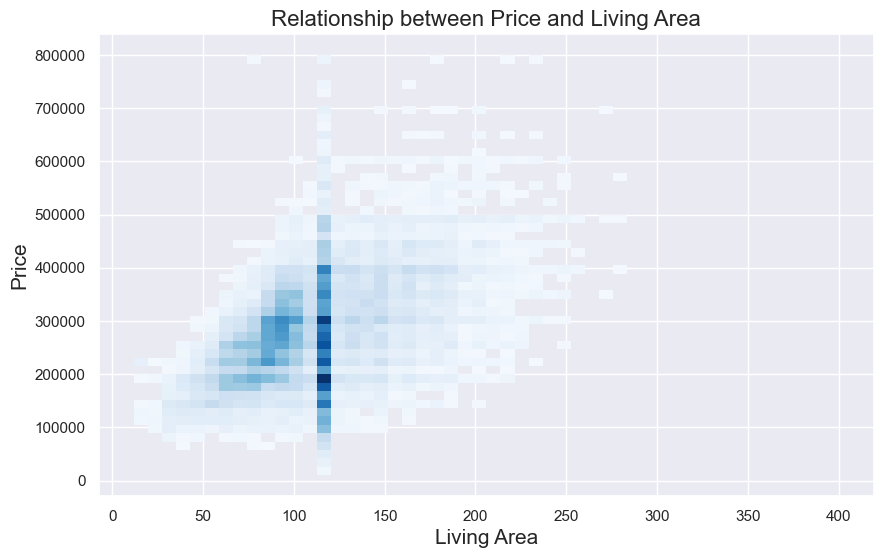

In [126]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('DF_price_living.area.csv')


df_price_filtered = df[
                       (df['Price'] < 800000) &
                       (df['Price'] > 10000) &
                       (df['Price'] != 0)]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_price_filtered, x='LivingArea', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and Living Area', fontsize=16)
plt.xlabel('Living Area', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()


Relationship between Price and State of Building

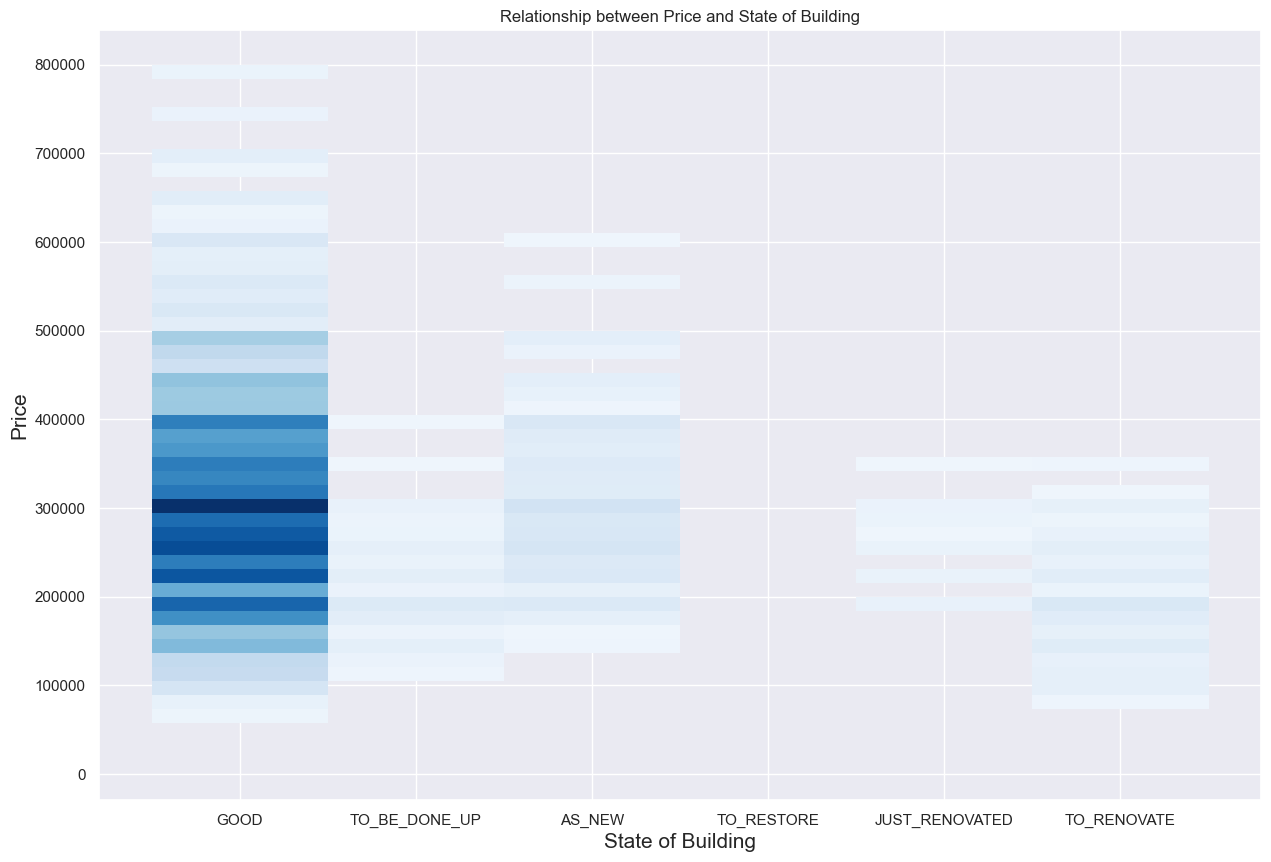

In [127]:

df = pd.read_csv('DF_cleaned.csv')

df_price_filtered = df[(df['ConstructionYear'] > 1900) & 
                       (df['Price'] < 800000) & 
                       (df['Price'] > 10000) & 
                       (df['Price'] != 0)]

plt.figure(figsize=(15, 10))
sns.histplot(data=df_price_filtered,x='StateOfBuilding', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and State of Building')
plt.xlabel('State of Building',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()


In [128]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('DF_cleaned.csv')


property_map = {
    1: 'GOOD',
    2: 'TO_BE_DONE_UP',
    3: 'AS_NEW',
    4: 'TO_RESTORE',
    5: 'JUST_RENOVATED',
    6: 'TO_RENOVATE'
}


df['TypeOfProperty'] = df['TypeOfProperty'].replace(property_map)


le = LabelEncoder()
df['StateOfBuilding_encoded'] = le.fit_transform(df['StateOfBuilding'])


correlation = df[['Price', 'StateOfBuilding_encoded']].corr(method='spearman')

print("Correlation between Price and StateOfBuilding (encoded):")
print(correlation)




Correlation between Price and StateOfBuilding (encoded):
                            Price  StateOfBuilding_encoded
Price                    1.000000                -0.061851
StateOfBuilding_encoded -0.061851                 1.000000
